In [221]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import h5py
from oasis.functions import deconvolve
from oasis import oasisAR1, oasisAR2
import pyute as ut

from importlib import reload
reload(ut)
import scipy.ndimage.filters as sfi
import scipy.stats as sst
import scipy.ndimage.measurements as snm
from mpl_toolkits.mplot3d import Axes3D
import figure_ground_analysis as fga
reload(fga)
import retinotopy_analysis as rt

In [142]:
# blcutoff = 1
# ds = 10
# blspan = 3000
# nbefore = 4
# nafter = 4
# def gen_trialwise(datafiles,blcutoff=blcutoff,blspan=blspan,frame_adjust=None): #nbefore=nbefore,nafter=nafter
#     trialwise = np.array(())
#     ctrialwise = np.array(())
#     strialwise = np.array(())
#     try:
#         for datafile in datafiles:
#             frm = sio.loadmat(datafile.replace('.rois','.mat'),squeeze_me=True)['info']['frame'][()][1:]
#             if frame_adjust:
#                 frm = frame_adjust(frm)
#             to_add = sio.loadmat(datafile,squeeze_me=True)['corrected']
#     #         baseline = np.percentile(to_add,blcutoff,axis=1)
#             baseline = sfi.percentile_filter(to_add[:,::ds],blcutoff,(1,int(blspan/ds)))
#             baseline = np.repeat(baseline,ds,axis=1)
#     #         if baseline.shape[1]<to_add.shape[1]:
#     #             baseline = np.hstack((baseline,np.repeat(baseline[:,-1],to_add.shape[1]-baseline.shape[1])))
#             if baseline.shape[1]>to_add.shape[1]:
#                 baseline = baseline[:,:to_add.shape[1]]
#             c = np.zeros_like(to_add)
#             s = np.zeros_like(to_add)
#             for i in range(c.shape[0]):
#     #                 dfof = (to_add[i]-baseline[i,np.newaxis])/baseline[i,np.newaxis]
#                 dfof = (to_add[i]-baseline[i,:])/baseline[i,:]
#                 c[i],s[i],_,_,_  = deconvolve(dfof,penalty=1)
#             print(datafile)
#             to_add = ut.trialize(to_add,frm,nbefore,nafter)
#             c = ut.trialize(c,frm,nbefore,nafter)
#             s = ut.trialize(s,frm,nbefore,nafter)
#             try:
#                 trialwise = np.concatenate((trialwise,to_add),axis=0)
#                 ctrialwise = np.concatenate((ctrialwise,c),axis=0)
#                 strialwise = np.concatenate((strialwise,s),axis=0)
#             except:
#                 trialwise = to_add.copy()
#                 ctrialwise = np.concatenate((ctrialwise,c),axis=0)
#                 strialwise = np.concatenate((strialwise,s),axis=0)
#     except:
#         for datafile in datafiles:
#             frm = sio.loadmat(datafile.replace('.rois','.mat'),squeeze_me=True)['info']['frame'][()][1:]
#             if np.remainder(frm.shape[0],2):
#                 frm = frm[:-1]
#             if frame_adjust:
#                 frm = frame_adjust(frm)
#             with h5py.File(datafile,mode='r') as f:
#                 to_add = f['corrected'][:].T
#                 to_add[np.isnan(to_add)] = 0
#     #             baseline = np.percentile(to_add,blcutoff,axis=1)
#                 baseline = sfi.percentile_filter(to_add[:,::ds],blcutoff,(1,int(blspan/ds)))
#                 baseline = np.repeat(baseline,ds,axis=1)
#                 for i in range(baseline.shape[0]):
#                     baseline[i] = sfi.gaussian_filter1d(baseline[i],blspan/2)
#     #             if baseline.shape[1]<to_add.shape[1]:
#     #                 baseline = np.hstack((baseline,np.repeat(baseline[:,-1],to_add.shape[1]-baseline.shape[1])))
#                 if baseline.shape[1]>to_add.shape[1]:
#                     baseline = baseline[:,:to_add.shape[1]]
#                 c = np.zeros_like(to_add)
#                 s = np.zeros_like(to_add)
#                 for i in range(c.shape[0]):
#     #                 dfof = (to_add[i]-baseline[i,np.newaxis])/baseline[i,np.newaxis]
#                     dfof = (to_add[i]-baseline[i,:])/baseline[i,:]
#                     try:
#                         c[i],s[i],_,_,_  = deconvolve(dfof,penalty=1,sn=5e-3)
#                     except:
# #                         throwaway = 0
#                         print("in "+datafile+" couldn't do "+str(i))
#                 to_add_temp = ut.trialize(to_add,frm,nbefore,nafter)
#                 ctemp = ut.trialize(c,frm,nbefore,nafter)
#                 stemp = ut.trialize(s,frm,nbefore,nafter)
#                 try:
#                     trialwise = np.concatenate((trialwise,to_add_temp),axis=0)
#                     ctrialwise = np.concatenate((ctrialwise,ctemp),axis=0)
#                     strialwise = np.concatenate((strialwise,stemp),axis=0)
# #                     print(to_add.shape)
#                 except:
#                     trialwise = to_add_temp.copy()
#                     ctrialwise = ctemp.copy()
#                     strialwise = stemp.copy()
#     return trialwise,ctrialwise,strialwise

In [143]:
# def get_nbydepth(datafiles):
#     nbydepth = np.zeros((len(datafiles),))
#     for i,datafile in enumerate(datafiles):
#         with h5py.File(datafile,mode='r') as f:
#             nbydepth[i] = (f['corrected'][:].T.shape[0])
#     return nbydepth

In [223]:
# ret = {}
# paramdict = {}
# pval = {}
# trialrun = {}
# nbydepth = {}
# spont = {}

In [145]:
#     def gen_traces(datafiles,blcutoff=blcutoff,blspan=blspan): #nbefore=nbefore,nafter=nafter
#         trialwise = np.array(())
#         ctrialwise = np.array(())
#         strialwise = np.array(())
#         dfofall = np.array(())
#         baselineall = np.array(())
#         for datafile in datafiles:
#             frm = sio.loadmat(datafile.replace('.rois','.mat'),squeeze_me=True)['info']['frame'][()][2:-10]
#             with h5py.File(datafile,mode='r') as f:
#                 to_add = f['corrected'][:].T
#                 to_add[np.isnan(to_add)] = 0
#     #             baseline = np.percentile(to_add,blcutoff,axis=1)
#                 baseline = sfi.percentile_filter(to_add[:,::ds],blcutoff,(1,int(blspan/ds)))
#                 baseline = np.repeat(baseline,ds,axis=1)
#                 for i in range(baseline.shape[0]):
#                     baseline[i] = sfi.gaussian_filter1d(baseline[i],blspan/2)
#     #             if baseline.shape[1]<to_add.shape[1]:
#     #                 baseline = np.hstack((baseline,np.repeat(baseline[:,-1],to_add.shape[1]-baseline.shape[1])))
#                 if baseline.shape[1]>to_add.shape[1]:
#                     baseline = baseline[:,:to_add.shape[1]]
#                 c = np.zeros_like(to_add)
#                 s = np.zeros_like(to_add)
#                 dfof = np.zeros_like(to_add)
#                 for i in range(c.shape[0]):
#     #                 dfof = (to_add[i]-baseline[i,np.newaxis])/baseline[i,np.newaxis]
#                     dfof[i] = (to_add[i]-baseline[i,:])/baseline[i,:]
#                     try:
#                         c[i],s[i],_,_,_  = deconvolve(dfof[i],penalty=1,sn=5e-4)
#                     except:
# #                         throwaway = 0
#                         print("in "+datafile+" couldn't do "+str(i))
#                 try:
#                     trialwise = np.concatenate((trialwise,to_add),axis=0)
#                     ctrialwise = np.concatenate((ctrialwise,c),axis=0)
#                     strialwise = np.concatenate((strialwise,s),axis=0)
#                     dfofall = np.concatenate((dfofall,dfof),axis=0)
#                     baselineall = np.concatenate((baselineall,baseline),axis=0)
#                 except:
#                     trialwise = to_add.copy()
#                     ctrialwise = c.copy()
#                     strialwise = s.copy()
#                     dfofall = dfof.copy()
#                     baselineall = baseline.copy()
#         return trialwise,ctrialwise,strialwise,dfofall,baselineall

In [146]:
# trialwise,ctrialwise,strialwise = gen_trialwise([datafold+file for file in datafiles])

KeyboardInterrupt: 

In [148]:
# plt.figure()
# plt.plot(strialwise.mean(0).mean(0))

In [132]:
# plt.figure()
# # plt.plot(ctrialwise[0])
# plt.plot(strialwise[0])
# plt.plot(dfofall[0])

In [8]:
# def analyze_figure_ground(datafiles,stimfile,retfile=None,frame_adjust=None):
#     nbydepth = get_nbydepth(datafiles)
#     trialwise,ctrialwise,strialwise = gen_trialwise(datafiles,frame_adjust=frame_adjust)
#     zstrialwise = sst.zscore(strialwise.reshape((strialwise.shape[0],-1)).T).T.reshape(strialwise.shape)
    
#     result = sio.loadmat(stimfile,squeeze_me=True)['result'][()]
    
#     infofile = sio.loadmat(datafiles[0][:-5]+'.mat',squeeze_me=True)
#     frame = infofile['info'][()]['frame'][()][1:]
#     if frame_adjust:
#         frame = frame_adjust(frame)
    
#     data = strialwise #[:,:,nbefore:-nafter]
    
#     try:
#         dxdt = sio.loadmat(datafiles[1],squeeze_me=True)['dxdt']
#     except:
#         with h5py.File(datafiles[1],mode='r') as f:
#             dxdt = f['dxdt'][:].T
            
#     trialrun = np.zeros(frame[0::2].shape)
#     for i in range(len(trialrun)):
#         trialrun[i] = dxdt[frame[0::2][i]:frame[1::2][i]].mean()
#     runtrial = trialrun>100
    
#     pval = np.zeros(strialwise.shape[0])
#     for i in range(strialwise.shape[0]):
#         _,pval[i] = sst.ttest_rel(strialwise[i,:,nbefore-1],strialwise[i,:,nbefore+1])
        
#     stimparams = result['stimParams']
    
#     order = ['ctrl','fig','grnd','iso','cross']
#     norder = len(order)
#     ori = stimparams[0]
#     sz = stimparams[1]
#     figContrast = stimparams[-2]
#     grndContrast = stimparams[-1]

#     paramdict = {}
#     paramdict['ctrl'] = np.logical_and(figContrast==0,grndContrast==0)
#     paramdict['fig'] = np.logical_and(figContrast==1,grndContrast==0)
#     paramdict['grnd'] = np.logical_and(np.logical_and(figContrast==0,grndContrast==1),sz>0)
#     paramdict['iso'] = sz==0
#     paramdict['cross'] = np.logical_and(figContrast==1,grndContrast==1)
        
# #     indexlut,stimp = np.unique(stimparams,axis=1,return_inverse=True)
    
#     angle = stimparams[0]
# #     size = stimparams[1]
# #     contrast = stimparams[4]
    
# #     ucontrast = np.unique(contrast)
#     uangle = np.unique(angle)
# #     usize = np.unique(size)
# #     ncontrast = len(ucontrast)
#     nangle = len(uangle)
# #     nsize = len(usize)
    
#     angle180 = np.remainder(angle,180)
#     uangle180 = np.unique(angle180)
#     nangle180 = len(uangle180)
    
#     Smean = np.zeros((strialwise.shape[0],norder,nangle180,strialwise.shape[2]))
#     Stavg = np.zeros((strialwise.shape[0],norder,nangle180,int(strialwise.shape[1]/nangle/norder)))
    
#     Strials = {}
#     Sspont = {}
#     for i,name in enumerate(order):
#         for j,theta in enumerate(uangle180):
#             lkat = np.logical_and(runtrial,np.logical_and(angle180==theta,paramdict[name]))
#             if lkat.sum()==1:
#                 print('problem')
#             Smean[:,i,j,:] = data[:,lkat,:].mean(1)
#             Strials[(i,j)] = data[:,lkat,nbefore:-nafter].mean(2)
#             Sspont[(i,j)] = data[:,lkat,:nbefore].mean(2)
    
#     lb = np.zeros((strialwise.shape[0],norder,nangle180))
#     ub = np.zeros((strialwise.shape[0],norder,nangle180))
    
#     for i in range(norder):
#         print(i)
#         for j in range(nangle180):
#             lb[:,i,j],ub[:,i,j] = ut.bootstrap(Strials[(i,j)],np.mean,axis=1,pct=(16,84))
#             # mn[:,i,j,k] = np.nanmean(Strials[(i,j,k)],axis=1)
    
#     pval = np.zeros((strialwise.shape[0],nangle180))
#     for j,theta in enumerate(uangle180):
#         print(theta)
#         figind = int(np.where(np.array([x=='fig' for x in order]))[0])
#         _,pval[:,j] = sst.ttest_rel(Sspont[(j,figind)],Strials[(j,figind)],axis=1)
                
#     Savg = np.nanmean(np.nanmean(Smean[:,:,:,nbefore:-nafter],axis=-1),axis=2)
    
# #     Storiavg = Stavg.mean(1)
#     # _,pval = sst.ttest_ind(Storiavg[:,0,-1].T,Storiavg[:,0,0].T)
    
#     #suppressed = np.logical_and(pval<0.05,Savg[:,0,-1]<Savg[:,0,0])
#     #facilitated = np.logical_and(pval<0.05,Savg[:,0,-1]>Savg[:,0,0])
    
#     return Savg,Smean,lb,ub,pval

In [9]:
# soriavg = {}
# strialavg = {}
# lb = {}
# ub = {}
# pval = {}
# nbydepth = {}

In [149]:
# datafoldbase = '/home/mossing/scratch/2Pdata/'
# datafold = datafoldbase+thisfold+'ot/'
# datafiles = [thisfile+'_ot_'+number+'.rois' for number in ['000','001','002','003']]
# infofile = sio.loadmat(datafold+datafiles[0][:-5]+'.mat',squeeze_me=True)
# frame = infofile['info'][()]['frame'][()][1:]

FileNotFoundError: [Errno 2] No such file or directory: '/home/mossing/scratch/2Pdata/180903/M8961/ot/M8961_150_004_ot_000.mat'

In [9]:
# frame.shape

(1200,)

In [10]:
# def analyze_everything(folds,files,rets,adjust_fns):
#     soriavg = {}
#     strialavg = {}
#     lb = {}
#     ub = {}
#     pval = {}
#     nbydepth = {}
#     datafoldbase = '/home/mossing/scratch/2Pdata/'
#     stimfoldbase = '/home/mossing/excitation/visual_stim/'
#     for thisfold,thisfile,retnumber,frame_adjust in zip(folds,files,rets,adjust_fns):
#         datafold = datafoldbase+thisfold+'ot/'
#         datafiles = [thisfile+'_ot_'+number+'.rois' for number in ['000','001','002','003']]

#         stimfold = stimfoldbase+thisfold
#         stimfile = thisfile+'.mat'

#         datafiles = [datafold+file for file in datafiles]
#         stimfile = stimfold+stimfile
#         retfile = datafoldbase+thisfold+'retinotopy_'+thisfile[-3:]+'.mat'

#         nbefore = 4
#         nafter = 4

#         soriavg[thisfold],strialavg[thisfold],lb[thisfold],ub[thisfold],pval[thisfold] = analyze_figure_ground(datafiles,stimfile,retfile,frame_adjust)
#         nbydepth[thisfold] = get_nbydepth(datafiles)
#     return soriavg,strialavg,lb,ub,pval,nbydepth

In [297]:
folds = []
files = []
rets = []
adjust_fns = []

def tack_on(thisfold,thisfile,retnumber,frame_adjust=None):
    folds.append(thisfold)
    files.append(thisfile)
    rets.append(retnumber)
    adjust_fns.append(frame_adjust)

thisfold = '180321/M7955/'
thisfile = 'M7955_000_002'
retnumber = '001'
frame_adjust = lambda x: x[1:-1]
tack_on(thisfold,thisfile,retnumber,frame_adjust)

thisfold = '180516/M8956/'
thisfile = 'M8956_115_004'
retnumber = '002'
frame_adjust = lambda x: x[1:]
tack_on(thisfold,thisfile,retnumber,frame_adjust)

thisfold = '180528/M8959/'
thisfile = 'M8959_100_004'
retnumber = '003'
frame_adjust = lambda x: x[1:]
tack_on(thisfold,thisfile,retnumber,frame_adjust)


thisfold = '180531/M8961/'
thisfile = 'M8961_135_004'
retnumber = '003'
frame_adjust = lambda x: x[1:]
tack_on(thisfold,thisfile,retnumber,frame_adjust=frame_adjust)

thisfold = '180618/M8956/'
thisfile = 'M8956_145_004'
retnumber = '002'
frame_adjust = lambda x: x
tack_on(thisfold,thisfile,retnumber,frame_adjust=frame_adjust)

thisfold = '180903/M8961/'
thisfile = 'M8961_150_004'
retnumber = '002'
frame_adjust = lambda x: x[1:]
tack_on(thisfold,thisfile,retnumber,frame_adjust=frame_adjust)

# thisfold = '180531/M8961/'
# thisfile = 'M8961_135_005'
# retnumber = '003'
# # frame_adjust = lambda x: np.delete(x,6)
# tack_on(thisfold,thisfile,retnumber)#,frame_adjust)

# frame_adjust = lambda x: np.delete(x,6)
# tack_on(thisfold,thisfile,retnumber,frame_adjust)

In [305]:
reload(fga)
reload(ut)
soriavg,strialavg,lb,ub,pval_fig,pval_grnd,nbydepth,ret_vars,trialrun = fga.analyze_everything(folds,files,rets,adjust_fns)

/home/mossing/scratch/2Pdata/180321/M7955/ot/M7955_000_002_ot_000.rois
(69, 10055)
/home/mossing/scratch/2Pdata/180321/M7955/ot/M7955_000_002_ot_001.rois
(98, 10055)
/home/mossing/scratch/2Pdata/180321/M7955/ot/M7955_000_002_ot_002.rois
(114, 10055)
/home/mossing/scratch/2Pdata/180321/M7955/ot/M7955_000_002_ot_003.rois
(84, 10054)
(365, 600, 20)
adjusted
(600,)
0
1
2
3
4
0.0
45.0
90.0
135.0
0.0
45.0
90.0
135.0
loaded retinotopy file
/home/mossing/scratch/2Pdata/180516/M8956/ot/M8956_115_004_ot_000.rois
(56, 1615)
/home/mossing/scratch/2Pdata/180516/M8956/ot/M8956_115_004_ot_001.rois
(77, 1615)
/home/mossing/scratch/2Pdata/180516/M8956/ot/M8956_115_004_ot_002.rois
(82, 1615)
/home/mossing/scratch/2Pdata/180516/M8956/ot/M8956_115_004_ot_003.rois
(75, 1615)
(290, 200, 16)
adjusted
(200,)
0
1
2
3
4
0.0
45.0
90.0
135.0
0.0
45.0
90.0
135.0
loaded retinotopy file
/home/mossing/scratch/2Pdata/180528/M8959/ot/M8959_100_004_ot_000.rois
(39, 4292)


/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


/home/mossing/scratch/2Pdata/180528/M8959/ot/M8959_100_004_ot_001.rois
(46, 4292)
/home/mossing/scratch/2Pdata/180528/M8959/ot/M8959_100_004_ot_002.rois
(55, 4291)
/home/mossing/scratch/2Pdata/180528/M8959/ot/M8959_100_004_ot_003.rois
(62, 4291)
(202, 400, 16)
adjusted
(400,)
0
1
2
3
4
0.0
45.0
90.0
135.0
0.0
45.0
90.0
135.0
loaded retinotopy file
/home/mossing/scratch/2Pdata/180531/M8961/ot/M8961_135_004_ot_000.rois
(37, 3167)
/home/mossing/scratch/2Pdata/180531/M8961/ot/M8961_135_004_ot_001.rois
(42, 3166)
/home/mossing/scratch/2Pdata/180531/M8961/ot/M8961_135_004_ot_002.rois
(43, 3166)
/home/mossing/scratch/2Pdata/180531/M8961/ot/M8961_135_004_ot_003.rois
(41, 3166)
(163, 400, 16)
adjusted
(400,)
0
1
2
3
4
0.0
45.0
90.0
135.0
0.0
45.0
90.0
135.0
loaded retinotopy file
/home/mossing/scratch/2Pdata/180618/M8956/ot/M8956_145_004_ot_000.rois
(180, 3245)
/home/mossing/scratch/2Pdata/180618/M8956/ot/M8956_145_004_ot_001.rois
(226, 3245)
/home/mossing/scratch/2Pdata/180618/M8956/ot/M8956_1

/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:164: RuntimeWarning: invalid value encountered in multiply
  penalty=penalty, **kwargs)


/home/mossing/scratch/2Pdata/180903/M8961/ot/M8961_150_004_ot_001.rois
(76, 4041)
/home/mossing/scratch/2Pdata/180903/M8961/ot/M8961_150_004_ot_002.rois
(63, 4041)
/home/mossing/scratch/2Pdata/180903/M8961/ot/M8961_150_004_ot_003.rois
(44, 4041)
(258, 400, 16)
adjusted
(400,)
0
1
2


/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


3
4
0.0
45.0
90.0
135.0
0.0
45.0
90.0
135.0
loaded retinotopy file


In [306]:
order = ['ctrl','fig','grnd','iso','cross']

In [307]:
ontarget_ret_lax = {}
for key in soriavg.keys():
    ontarget_ret_lax[key],_ = rt.ontarget_by_retinotopy(ret_vars[key],ctr=ret_vars[key]['position'],rg=10)

/home/mossing/Documents/code/adesnal/retinotopy_analysis.py:260: RuntimeWarning: invalid value encountered in less
  return np.logical_and((xo+ctr_ret[0]-ctr[0])**2+(-yo+ctr_ret[1]-ctr[1])**2<rg**2,pval_ret<pcutoff),np.hstack((xo,yo))


<IPython.core.display.Javascript object>


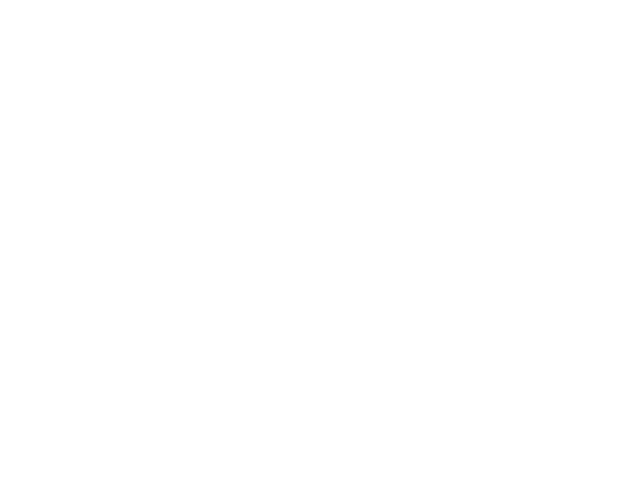

(365, 5)
(365, 4)
(202, 5)
(202, 4)
(163, 5)
(163, 4)
(949, 5)
(949, 4)


In [312]:
ontarget = {}
plt.figure()
keylist = list(soriavg.keys())
for i,key in enumerate(keylist):
    if i in (0,2,3,4):
        print(soriavg[key].shape)
        print(pval_fig[key].shape)
        ontarget[key] = pval_fig[key].min(1)<0.05/pval_fig[key].shape[1]
        lkat = np.logical_not(np.isnan(pval_fig[key]))
        plt.plot(np.arange(pval_fig[key].shape[0])/pval_fig[key].shape[0],np.sort(pval_fig[key].min(1)))
plt.plot((0,1),(0,0.25),c='k')
keylist.remove(keylist[-1])
keylist.remove(keylist[1])

In [309]:
np.sort(pval_fig[key]).shape

(258, 4)

In [310]:
ret_vars[key]['paramdict_normal']['amplitude'][()].shape
ontarget[key].shape

KeyError: '180903/M8961/'

<IPython.core.display.Javascript object>


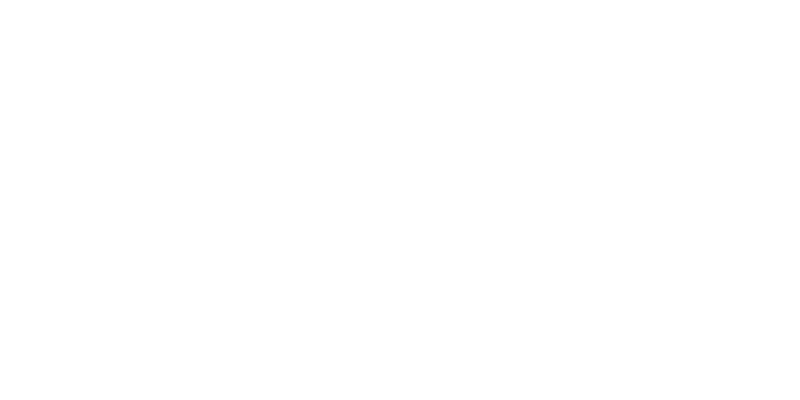

(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)


In [318]:
plt.figure(figsize=(8,4))
XX = np.array(())
YY = np.array(())

plt.subplot(1,2,1)

plt.scatter(-1,-1,s=20,c='r',edgecolors='w',alpha=0.75)
plt.scatter(-1,-1,s=20,c='b',edgecolors='w',alpha=0.5)
        
    
for key in keylist:
#     try:
    print(ret_vars[key]['paramdict_normal']['amplitude'][()].shape)
    print(ontarget[key].shape)
    lkat = np.logical_and(ret_vars[key]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[key])
    xx = soriavg[key][lkat,0]
    yy = soriavg[key][lkat,2]
    plt.scatter(xx,yy,s=20,c='r',edgecolors='w',alpha=0.75)
#     except:
#         print(key+' didnt work')
    
for key in keylist:
    lkat = np.logical_and(ret_vars[key]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[key])
    xx = soriavg[key][lkat,0]
    yy = soriavg[key][lkat,2]
    plt.scatter(xx,yy,s=20,c='b',edgecolors='w',alpha=0.5)
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)

    
plt.legend(['contrast-facilitated','contrast-suppressed'])

    
plt.plot((0,4),(0,4))
plt.xlim(0,1.5)
plt.ylim(0,1.5)
plt.xlabel('inferred event rate ctrl')
plt.ylabel('inferred event rate grnd')

#     XX = ut.add_to_array(XX,xx)
#     YY = ut.add_to_array(YY,yy)


matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate ctrl'
matdict['labelY'] = 'inferred event rate grnd'


plt.subplot(1,2,2)

plt.scatter(-1,-1,s=20,c='r',edgecolors='w',alpha=0.75)
plt.scatter(-1,-1,s=20,c='b',edgecolors='w',alpha=0.5)
        
    
for key in keylist:
    print(ret_vars[key]['paramdict_normal']['amplitude'][()].shape)
    print(ontarget[key].shape)
    lkat = np.logical_and(ret_vars[key]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[key])
    xx = soriavg[key][lkat,2]
    yy = soriavg[key][lkat,3]
    plt.scatter(xx,yy,s=20,c='r',edgecolors='w',alpha=0.75)
    
for key in keylist:
    lkat = np.logical_and(ret_vars[key]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[key])
    xx = soriavg[key][lkat,2]
    yy = soriavg[key][lkat,3]
    plt.scatter(xx,yy,s=20,c='b',edgecolors='w',alpha=0.5)
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)

    
plt.legend(['contrast-facilitated','contrast-suppressed'])

    
plt.plot((0,4),(0,4))
plt.xlim(0,1.5)
plt.ylim(0,1.5)
plt.xlabel('inferred event rate grnd')
plt.ylabel('inferred event rate iso-oriented')

#     XX = ut.add_to_array(XX,xx)
#     YY = ut.add_to_array(YY,yy)


matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate iso-oriented'
matdict['labelY'] = 'inferred event rate cross-oriented'

<IPython.core.display.Javascript object>


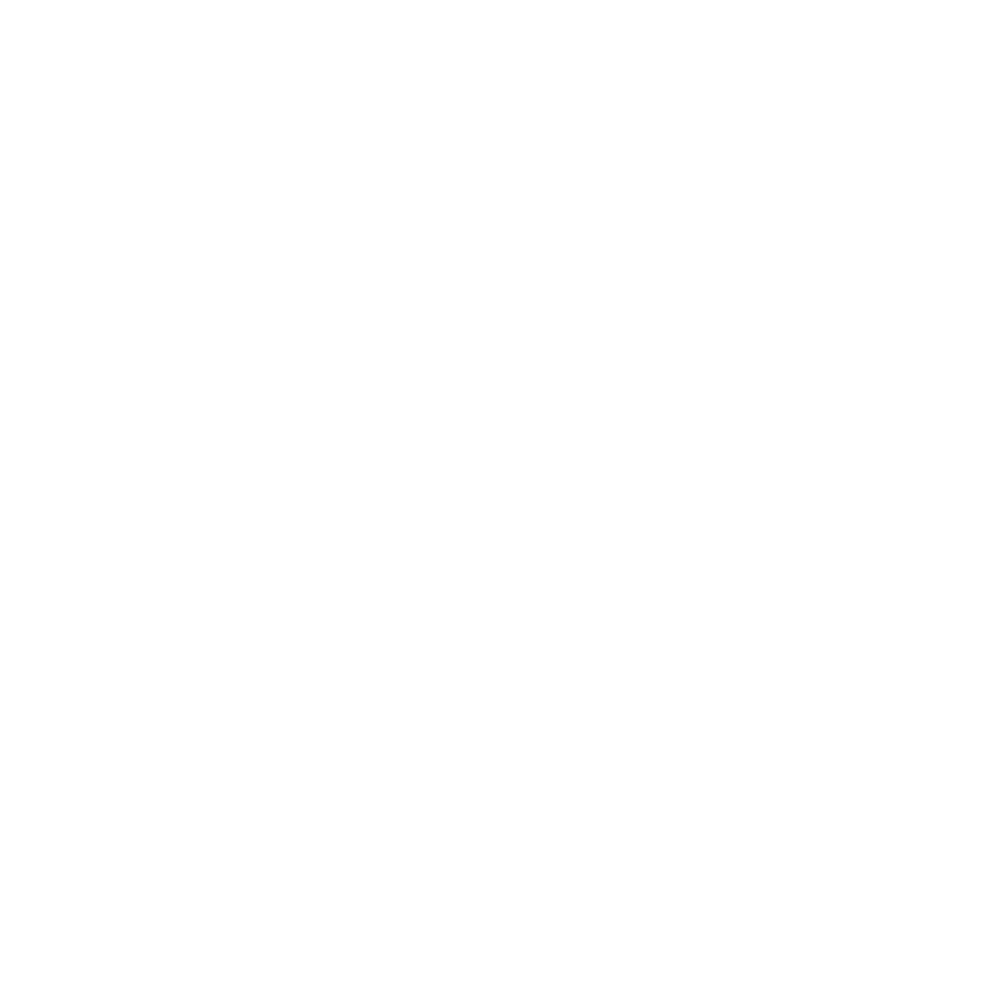

(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
180321/M7955/ didnt work
(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
180321/M7955/ didnt work
(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
180321/M7955/ didnt work
(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
180321/M7955/ didnt work
(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
180321/M7955/ didnt work
(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
180321/M7955/ didnt work
(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
180321/M7955/ didnt work
(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
180321/M7955/ didnt work
(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
180321/M7955/ didnt work
(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
180321/M7955/ didnt work
(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
180321/M7955/ didnt work
(365,)
(365,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
180321/M7955/ didnt work
(365,)
(365,)
(202,)
(202,)


In [324]:
plt.figure(figsize=(10,10))
XX = np.array(())
YY = np.array(())

for i in range(5):
    for j in range(5):
        plt.subplot(5,5,5*i+j+1)

        plt.scatter(-1,-1,s=20,c='r',edgecolors='w',alpha=0.75)
        plt.scatter(-1,-1,s=20,c='b',edgecolors='w',alpha=0.5)


        for key in keylist:
        #     try:
            print(ret_vars[key]['paramdict_normal']['amplitude'][()].shape)
            print(ontarget[key].shape)
            lkat = np.logical_and(ret_vars[key]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[key])
            mx = soriavg[key][lkat].max()[np.newaxis]
            xx = soriavg[key][lkat,i]
            yy = soriavg[key][lkat,j]
            plt.scatter(xx,yy,s=20,c='r',edgecolors='w',alpha=0.75)
        #     except:
        #         print(key+' didnt work')

        for key in keylist:
            try:
                lkat = np.logical_and(ret_vars[key]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[key])
                mx = soriavg[key][lkat].max()[np.newaxis]
                xx = soriavg[key][lkat,i]
                yy = soriavg[key][lkat,j]
                plt.scatter(xx,yy,s=20,c='b',edgecolors='w',alpha=0.5)
            except:
                print(key+' didnt work')
            XX = ut.add_to_array(XX,xx)
            YY = ut.add_to_array(YY,yy)


        plt.plot((0,4),(0,4))
        plt.xlim(0,1.5)
        plt.ylim(0,1.5)
        plt.xlabel('inferred event rate ctrl')
        plt.ylabel('inferred event rate grnd')

<IPython.core.display.Javascript object>


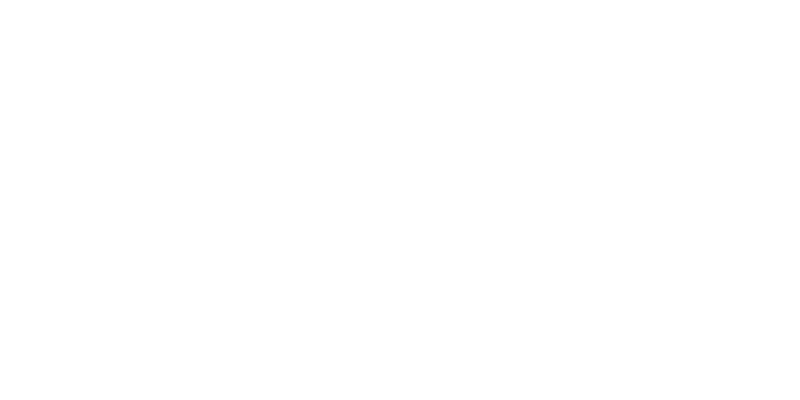

(365,)
(365,)
(290,)
(290,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
(258,)
(258,)
180321/M7955/ didnt work
(365,)
(365,)
(290,)
(290,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
(258,)
(258,)
180321/M7955/ didnt work


In [251]:
plt.figure(figsize=(8,4))
XX = np.array(())
YY = np.array(())

plt.subplot(1,2,1)

plt.scatter(-1,-1,s=20,c='r',edgecolors='w',alpha=0.75)
plt.scatter(-1,-1,s=20,c='b',edgecolors='w',alpha=0.5)
        
    
for key in soriavg.keys():
    try:
        print(ret_vars[key]['paramdict_normal']['amplitude'][()].shape)
        print(ontarget[key].shape)
        lkat = np.logical_and(ret_vars[key]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[key])
        mx = soriavg[key][lkat].max()[np.newaxis]
        xx = soriavg[key][lkat,2]
        yy = soriavg[key][lkat,3]
        plt.scatter(xx,yy,s=20,c='r',edgecolors='w',alpha=0.75)
    except:
        print(key+' didnt work')
    
for key in soriavg.keys():
    try:
        lkat = np.logical_and(ret_vars[key]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[key])
        mx = soriavg[key][lkat].max()[np.newaxis]
        xx = soriavg[key][lkat,2]
        yy = soriavg[key][lkat,3]
        plt.scatter(xx,yy,s=20,c='b',edgecolors='w',alpha=0.5)
    except:
        print(key+' didnt work')
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)

    
plt.legend(['contrast-facilitated','contrast-suppressed'])

    
plt.plot((0,4),(0,4))
plt.xlim(0,1.5)
plt.ylim(0,1.5)
plt.xlabel('inferred event rate ctrl')
plt.ylabel('inferred event rate fig')

#     XX = ut.add_to_array(XX,xx)
#     YY = ut.add_to_array(YY,yy)


matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate ctrl'
matdict['labelY'] = 'inferred event rate grnd'


plt.subplot(1,2,2)

plt.scatter(-1,-1,s=20,c='r',edgecolors='w',alpha=0.75)
plt.scatter(-1,-1,s=20,c='b',edgecolors='w',alpha=0.5)
        
    
for key in soriavg.keys():
    try:
        print(ret_vars[key]['paramdict_normal']['amplitude'][()].shape)
        print(ontarget[key].shape)
        lkat = np.logical_and(ret_vars[key]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[key])
        mx = soriavg[key][lkat].max()[np.newaxis]
        xx = soriavg[key][lkat,2]
        yy = soriavg[key][lkat,4]
        plt.scatter(xx,yy,s=20,c='r',edgecolors='w',alpha=0.75)
    except:
        print(key+' didnt work')
    
for key in soriavg.keys():
    try:
        lkat = np.logical_and(ret_vars[key]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[key])
        mx = soriavg[key][lkat].max()[np.newaxis]
        xx = soriavg[key][lkat,2]
        yy = soriavg[key][lkat,4]
        plt.scatter(xx,yy,s=20,c='b',edgecolors='w',alpha=0.5)
    except:
        print(key+' didnt work')
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)

    
plt.legend(['contrast-facilitated','contrast-suppressed'])

    
plt.plot((0,4),(0,4))
plt.xlim(0,1.5)
plt.ylim(0,1.5)
plt.xlabel('inferred event rate grnd')
plt.ylabel('inferred event rate iso-oriented')

#     XX = ut.add_to_array(XX,xx)
#     YY = ut.add_to_array(YY,yy)


matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate iso-oriented'
matdict['labelY'] = 'inferred event rate cross-oriented'

<IPython.core.display.Javascript object>


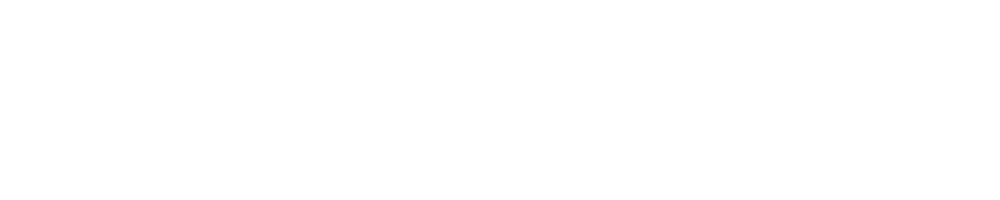

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [335]:
plt.figure(figsize=(10,2))
XX = np.array(())
YY = np.array(())


# plt.scatter(-1,-1,s=20,c='r',edgecolors='w',alpha=0.75)
# plt.scatter(-1,-1,s=20,c='b',edgecolors='w',alpha=0.5)
        
for j in range(5):
    plt.subplot(1,5,j+1)
    for key in keylist:
        lkat = ontarget_ret_lax[key]
        mx = soriavg[key][lkat].max()[np.newaxis]
        xx = soriavg[key][lkat,2]
        yy = soriavg[key][lkat,j]
        plt.scatter(xx,yy,s=20,c='m',edgecolors='w',alpha=0.75)


        # plt.legend(['contrast-facilitated','contrast-suppressed'])
    plt.title('grnd vs. '+ order[j])


    plt.plot((0,2),(0,2))
    plt.xlim(0,2)
    plt.ylim(0,2)
# plt.xlabel('inferred event rate ctrl')
# plt.ylabel('inferred event rate grnd')

#     XX = ut.add_to_array(XX,xx)
#     YY = ut.add_to_array(YY,yy)


matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate ctrl'
matdict['labelY'] = 'inferred event rate grnd'
plt.subplot(1,5,1)
plt.xlabel('inferred event rate')
plt.ylabel('inferred event rate')
plt.legend(['','VIP'])
plt.savefig('vip_ground_stimulus.pdf')

In [232]:
order

['ctrl', 'fig', 'grnd', 'iso', 'cross']

<IPython.core.display.Javascript object>


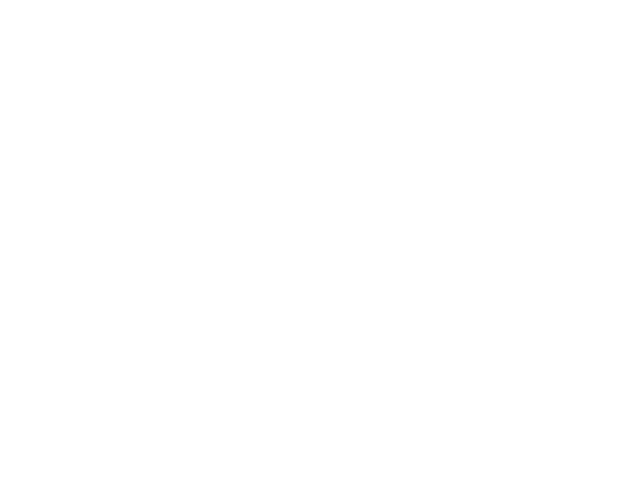

(365,)
(365,)
(290,)
(290,)
(202,)
(202,)
(163,)
(163,)
(949,)
(949,)
(258,)
(258,)
180321/M7955/ didnt work


In [237]:
plt.figure()
XX = np.array(())
YY = np.array(())

plt.scatter(-1,-1,s=20,c='r',edgecolors='w',alpha=0.75)
plt.scatter(-1,-1,s=20,c='b',edgecolors='w',alpha=0.5)
        
    
for key in soriavg.keys():
    try:
        print(ret_vars[key]['paramdict_normal']['amplitude'][()].shape)
        print(ontarget[key].shape)
        lkat = np.logical_and(ret_vars[key]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[key])
        mx = soriavg[key][lkat].max()[np.newaxis]
        xx = soriavg[key][lkat,1]
        yy = soriavg[key][lkat,4]
        plt.scatter(xx,yy,s=20,c='r',edgecolors='w',alpha=0.75)
    except:
        print(key+' didnt work')
    
for key in soriavg.keys():
    try:
        lkat = np.logical_and(ret_vars[key]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[key])
        mx = soriavg[key][lkat].max()[np.newaxis]
        xx = soriavg[key][lkat,1]
        yy = soriavg[key][lkat,4]
        plt.scatter(xx,yy,s=20,c='b',edgecolors='w',alpha=0.5)
    except:
        print(key+' didnt work')
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)

    
plt.legend(['contrast-facilitated','contrast-suppressed'])

    
plt.plot((0,4),(0,4))
plt.xlim(0,1.5)
plt.ylim(0,1.5)
plt.xlabel('inferred event rate ground')
plt.ylabel('inferred event rate cross-oriented')

#     XX = ut.add_to_array(XX,xx)
#     YY = ut.add_to_array(YY,yy)


matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate iso-oriented'
matdict['labelY'] = 'inferred event rate cross-oriented'
# plt.savefig('vip_iso_cross.pdf')
# sio.savemat('updated_vip_iso_cross.mat',matdict)

In [200]:
np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[keylist[k]])

NameError: name 'keylist' is not defined

In [69]:
ret_vars.values()

dict_values([None, None, None])

<IPython.core.display.Javascript object>


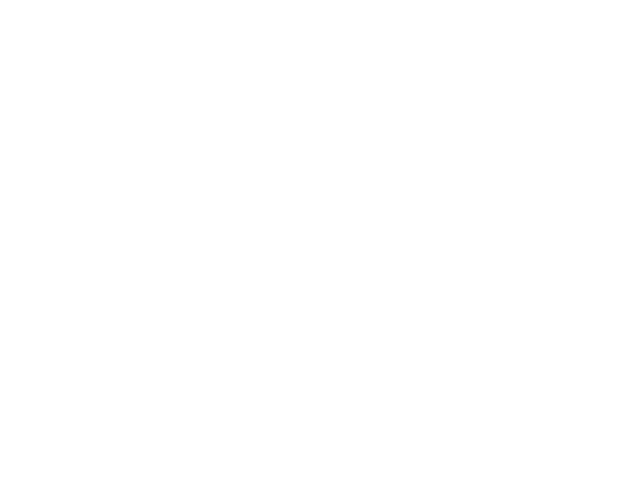

TypeError: 'NoneType' object is not subscriptable

In [64]:
plt.figure()
XX = np.array(())
YY = np.array(())
for key in soriavg.keys():
    mx = 1 #soriavg[key][ontarget[key]].max()[np.newaxis]
    lkat = np.logical_and(ret_vars[key]['paramdict_normal']['amplitude'][()]>0,ontarget[key])
    xx = soriavg[key][ontarget[key],3]/mx
    yy = soriavg[key][ontarget[key],4]/mx
    plt.scatter(xx,yy,s=1)
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)
plt.plot((0,4),(0,4))
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)

matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate iso-oriented'
matdict['labelY'] = 'inferred event rate cross-oriented'
# sio.savemat('updated_vip_iso_cross_non_norm.mat',matdict)